# get_scores walkthrough

In this walkthrough, we will run get_scores on CTCF binding site deletions, which we generated in [custom_perturbations.ipynb](https://github.com/ketringjoni/Akita_variant_scoring/blob/main/walkthroughs/custom_perturbations.ipynb).

To do so, we've run the following command (the output of the following cell) in the terminal. By changing the variables below, you can get a command that fits your custom set of perturbations. Note: there are more arguments available that are not included here.  

In [1]:
import pandas as pd
import numpy as np 
import os
from collections import Counter

in_file = '../temp_input'# '../test/input/CTCF_del_symb_alleles' # A set of 50 CTCF deletions
scores_to_use = 'mse corr ssi' # Three different disruption scoring methods
shift_by = '-1 0 1' # Shift sequences by 1 bp left and right
revcomp = 'add_revcomp' # Also score the reverse complement of all sequences
file = 'CTCF_del' # Output files prefix
directory = '../test/output' # Output directory

print('Run this command in the main directory:\n')
print('python scripts/score_var.py', in_file,
      '--scores', scores_to_use,
      '--shift_by', shift_by,
      '--revcomp', revcomp,
      '--file', file,
      '--dir', directory,
      '--get_scores',
      '--get_maps',
      '--get_tracks')


Run this command in the main directory:

python scripts/score_var.py ../temp_input --scores mse corr ssi --shift_by -1 0 1 --revcomp add_revcomp --file CTCF_del --dir ../test/output --get_scores --get_maps --get_tracks


In [2]:
# Get path to output files
out_file = os.path.join(directory, file)

In [3]:
variants = pd.read_csv(in_file, sep = '\t')

In [ ]:
# Read input

import sys
sys.path.insert(0, '../scripts')

import reading_utils
reading_utils.var_set_size = 10000000000

variants = reading_utils.read_input(in_file, 0)
variants

# Filtered_out file

Check filtered_out file for any perturbations that were filtered out

In [12]:
# Read filtered out file

filtered_out_file = f'{out_file}_filtered_out'

if os.path.getsize(filtered_out_file) == 0:
    print('No perturbations were filtered out.')
else:
    with open(filtered_out_file) as f:
        filtered_out = f.read().splitlines()

No perturbations were filtered out.


In [ ]:
# Get the number of variants that were filtered out for each type of reason

Counter([x.split(': ')[1] for x in filtered_out])

In [ ]:
# Get list of perturbations (input row number) that were filtered out

filtered_out_rows = np.unique([int(x.split(': ')[0]) for x in filtered_out])

filtered_out_rows[:10]

# Log file

Check the log file for errors and warnings

In [106]:
# Read log file

with open('test/output/run_test_SV_log') as f: # f'{out_file}_log'
    log = f.read().splitlines()

log[:10]

['0 (-10000 shift)',
 '0 (-10000 shift_revcomp)',
 '0 (0 shift)',
 '0 (0 shift_revcomp)',
 '0 (10000 shift)',
 '0 (10000 shift_revcomp)',
 '1 (-10000 shift)',
 '1 (-10000 shift_revcomp)',
 '1 (0 shift)',
 '1 (0 shift_revcomp)']

In [114]:
print('There are',len(log),'log messages so the counts below are out of', len(log))

There are 5436 log messages so the counts below are out of 5436


## Warnings

In [107]:
# Get perturbations that had warnings

warnings = [x for x in log if 'Warning' in x]

warnings[:10]

['7 (-10000 shift): Warning: Variant not centered; too close to chromosome arm ends.',
 '7 (-10000 shift_revcomp): Warning: Variant not centered; too close to chromosome arm ends.',
 '7 (0 shift): Warning: Variant not centered; too close to chromosome arm ends.',
 '7 (0 shift_revcomp): Warning: Variant not centered; too close to chromosome arm ends.',
 '7 (10000 shift): Warning: Variant not centered; too close to chromosome arm ends.',
 '7 (10000 shift_revcomp): Warning: Variant not centered; too close to chromosome arm ends.',
 '8 (-10000 shift): Warning: Variant not centered; too close to chromosome arm ends.',
 '8 (-10000 shift_revcomp): Warning: Variant not centered; too close to chromosome arm ends.',
 '8 (0 shift): Warning: Variant not centered; too close to chromosome arm ends.',
 '8 (0 shift_revcomp): Warning: Variant not centered; too close to chromosome arm ends.']

In [108]:
# Get the number of each type of warning message

Counter([x.split('Warning: ')[1] for x in warnings])

Counter({'Variant not centered; too close to chromosome arm ends.': 168,
         'Variant not centered; too close to chromosome arm ends': 1224})

In [109]:
# Get list of perturbations (input row number) that have warnings in at least one of the conditions

warning_rows = np.unique([x.split(' (')[0] for x in warnings])

warning_rows[:10]

array(['10', '102', '103', '11', '114', '115', '118', '119', '12', '13'],
      dtype='<U3')

## Errors

In [123]:
# Get perturbations that had errors

errors = [x for x in log if 'Error' in x]
error_messages = [x.split('Error: ')[1] for x in errors]

errors[:10]

['35 (-10000 shift): Error: Centromeric variant',
 '35 (-10000 shift_revcomp): Error: Centromeric variant',
 '35 (0 shift): Error: Centromeric variant',
 '35 (0 shift_revcomp): Error: Centromeric variant',
 '35 (10000 shift): Error: Centromeric variant',
 '35 (10000 shift_revcomp): Error: Centromeric variant',
 '36 (-10000 shift): Error: Centromeric variant',
 '36 (-10000 shift_revcomp): Error: Centromeric variant',
 '36 (0 shift): Error: Centromeric variant',
 '36 (0 shift_revcomp): Error: Centromeric variant']

In [150]:
# These are all the expected error messages

with open('get_seq_utils.py', 'r') as f:
    get_seq_error_messages = np.unique([l.split('\'')[1] for l in f if 'raise ValueError' in l])

print('get_seq expected error messages:\n\n', get_seq_error_messages, '\n\n')

with open('get_scores_utils.py', 'r') as f:
    get_scores_error_messages = np.unique([l.split('\'')[1] for l in f if 'raise ValueError' in l])

print('get_scores expected error messages:\n\n', get_scores_error_messages)


get_seq expected error messages:

 ['Alternate sequence generated is not the right length.'
 'Cannot generate 1Mb sequence for this chromosomal rearrangement.'
 'Centromeric variant' 'N composition greater than 5%'
 'Reference allele does not match hg38.'
 'Reference sequence generated is not the right length.'
 'SV type not supported.'
 'Sequence for the alternate allele does not match hg38 at REF position.'
 'Unexpected format: BND ALT does not include REF'
 'Variant larger than set limit.'] 


get_scores expected error messages:

 ['Variant outside prediction window after cropping']


In [124]:
# Get the number of each type of expected error message

Counter(error_messages)

Counter({'Centromeric variant': 1626,
         'Cannot generate 1Mb sequence for this chromosomal rearrangement.': 1152})

In [141]:
# Get number of get_seq and get_scores error messages

print(len([x for x in error_messages if x in get_seq_error_messages]), 'get_seq error messages')
print(len([x for x in error_messages if x in get_scores_error_messages]), 'get_scores error messages')

2778 get_seq error messages
0 get_scores error messages


In [148]:
# Check if any of these errors are unexpected

[x for x in error_messages if x not in get_seq_error_messages and x not in get_scores_error_messages]

[]

In [149]:
# Get list of perturbations (input row number) that have errors in at least one of the conditions

error_rows = np.unique([x.split(' (')[0] for x in errors])

error_rows[:10]

array(['100', '101', '104', '105', '106', '107', '110', '111', '116',
       '117'], dtype='<U3')

# Scores file

In [4]:
# Read scores file

scores = pd.read_csv(f'{out_file}_scores', sep = '\t')
scores.iloc[:10,:10]

,var_index,mse_-1,corr_-1,ssi_-1,mse_-1_revcomp,corr_-1_revcomp,ssi_-1_revcomp,mse_0,corr_0,ssi_0
0,0,0.003009,0.984663,0.868784,0.009729,0.945812,0.819903,0.006867,0.960436,0.804799
1,1,0.004472,0.992411,0.894348,0.008358,0.989194,0.887001,0.004990,0.991197,0.883912
2,2,0.006182,0.989617,0.880776,0.005114,0.993450,0.913697,0.009294,0.984339,0.865941
3,3,0.014067,0.958523,0.781531,0.002888,0.992808,0.907482,0.004430,0.984087,0.867389
4,4,0.005012,0.973819,0.839552,0.002822,0.983123,0.875333,0.004997,0.980311,0.865158
5,5,0.003381,0.984231,0.846434,0.004742,0.974394,0.812070,0.003852,0.981589,0.860201
6,6,0.004194,0.964545,0.827798,0.005160,0.938284,0.792826,0.003161,0.979445,0.872490
7,7,0.003248,0.968563,0.842249,0.013756,0.846422,0.653562,0.005499,0.931995,0.736682
8,8,0.002732,0.878060,0.811992,0.001859,0.925405,0.800749,0.002384,0.885885,0.768294
9,9,0.003190,0.990839,0.897308,0.020391,0.942609,0.759524,0.003946,0.990144,0.890148


In [5]:
# These are all the scores that were calculated 
scores.columns[1:]

Index(['mse_-1', 'corr_-1', 'ssi_-1', 'mse_-1_revcomp', 'corr_-1_revcomp',
       'ssi_-1_revcomp', 'mse_0', 'corr_0', 'ssi_0', 'mse_0_revcomp',
       'corr_0_revcomp', 'ssi_0_revcomp', 'mse_1', 'corr_1', 'ssi_1',
       'mse_1_revcomp', 'corr_1_revcomp', 'ssi_1_revcomp'],
      dtype='object')

In [6]:
# Add scores dataframe to input dataframe to match them with information about the perturbations

scores = pd.concat([variants, scores], axis = 1)
scores.iloc[:10,:10]

,CHROM,POS,END,REF,ALT,SVTYPE,SVLEN,var_index,mse_-1,corr_-1
0,chr1,100276250.0,100376250.0,-,-,DUP,100000.0,0,0.003009,0.984663
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.004472,0.992411
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.006182,0.989617
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0.014067,0.958523
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0.005012,0.973819
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0.003381,0.984231
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0.004194,0.964545
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0.003248,0.968563
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0.002732,0.878060
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0.003190,0.990839


## Compare scores

In [11]:
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Function for plotting 2 variables and getting the correlation between them

def compare_scores(x_axis, x_axis_label, y_axis, y_axis_label):
    plt.scatter(x_axis, y_axis)

    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label,rotation=90)

    z = np.polyfit(x_axis, y_axis, 1)
    p = np.poly1d(z)
    plt.plot(x_axis,p(x_axis),"r--")

    print(f'correlation between {x_axis_label} and {y_axis_label} =', stats.spearmanr(x_axis, y_axis)[0])

    plt.show()

correlation between Mean squared error and Spearman correlation = 0.33560624249699883


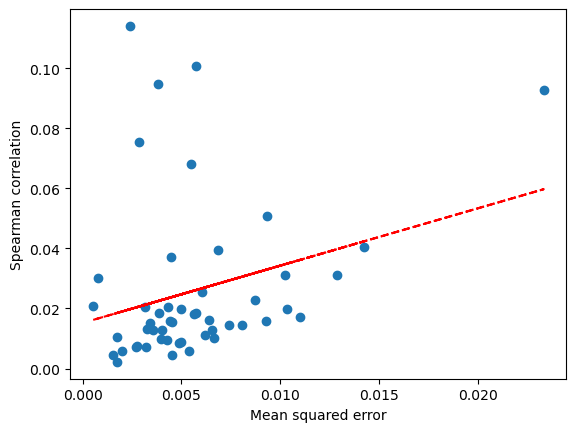

In [21]:
# Compare scoring methods
compare_scores(scores.mse_0, 'Mean squared error', 1 - scores.corr_0, 'Spearman correlation')

correlation between No shift and Shift = 0.31188475390156056


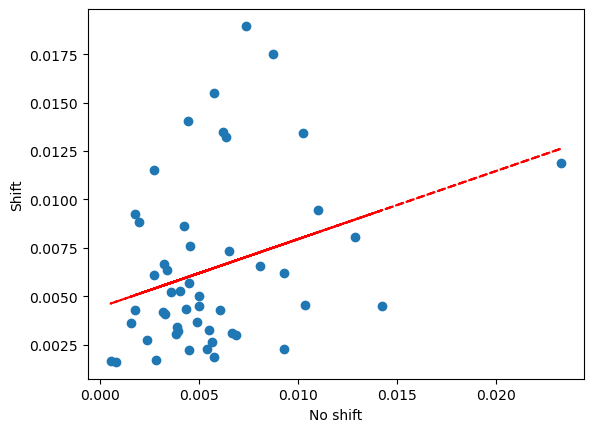

In [23]:
# Compare augmentated scores

scoring_method = 'mse'
shift = '-1'

no_shift = scores[f'{scoring_method}_0']
shift = scores[f'{scoring_method}_{shift}']

compare_scores(no_shift, 'No shift', shift, 'Shift')

## Rank perturbations

In [21]:
# Get the average augmented score

scoring_method = 'mse'

scores[f'{scoring_method}_mean'] = scores[[f'{scoring_method}_-1', 
                                            f'{scoring_method}_0', 
                                            f'{scoring_method}_1', 
                                            f'{scoring_method}_0_revcomp']].mean(axis = 1)

KeyError: "None of [Index(['mse_-1', 'mse_0', 'mse_1', 'mse_0_revcomp'], dtype='object')] are in the [columns]"

In [22]:
# Get most disruptive CTCF site

scores.sort_values('mse_mean', ascending = False).head()

,CHROM,POS,END,REF,ALT,SVTYPE,SVLEN,var_index,mse_mean,corr_mean
829,chr10,4834359,5133665,A,<DUP:TANDEM>,DUP,299306,829,0.229936,0.875021
25,chr1,58064887,58560456,T,<DEL>,DEL,-495569,25,0.153837,0.857328
894,chr11,36128997,36323402,A,<DEL>,DEL,-194405,894,0.108099,0.666748
1355,chr22,36092213,36418421,A,<DEL>,DEL,-326208,1355,0.096089,0.833312
64,chr1,149799777,150031617,G,<DUP:TANDEM>,DUP,231840,64,0.095290,0.723767


# Maps files

In [7]:
import sys
sys.path.insert(0, '../scripts')

import math
import plotting_utils

In [8]:
# Read in maps

maps = np.load('../temp_output/score_var_results_maps.npy', allow_pickle="TRUE").item() # f'{out_file}_maps.npy'
maps

{'0_0': [array([[        nan,         nan, -0.06136343, ..., -0.25403059,
          -0.2540319 , -0.25779426],
         [        nan,         nan,         nan, ..., -0.25678056,
          -0.25701606, -0.25970259],
         [-0.06136343,         nan,         nan, ..., -0.26049536,
          -0.26028308, -0.26215559],
         ...,
         [-0.25403059, -0.25678056, -0.26049536, ...,         nan,
                  nan, -0.01654395],
         [-0.2540319 , -0.25701606, -0.26028308, ...,         nan,
                  nan,         nan],
         [-0.25779426, -0.25970259, -0.26215559, ..., -0.01654395,
                  nan,         nan]]),
  array([[        nan,         nan, -0.05543056, ..., -0.16421762,
          -0.16893345, -0.17428455],
         [        nan,         nan,         nan, ..., -0.16511309,
          -0.16689676, -0.17553714],
         [-0.05543056,         nan,         nan, ..., -0.16689336,
          -0.1676662 , -0.17414805],
         ...,
         [-0.16421762, -0.1

In [9]:
maps.keys()

dict_keys(['0_0'])

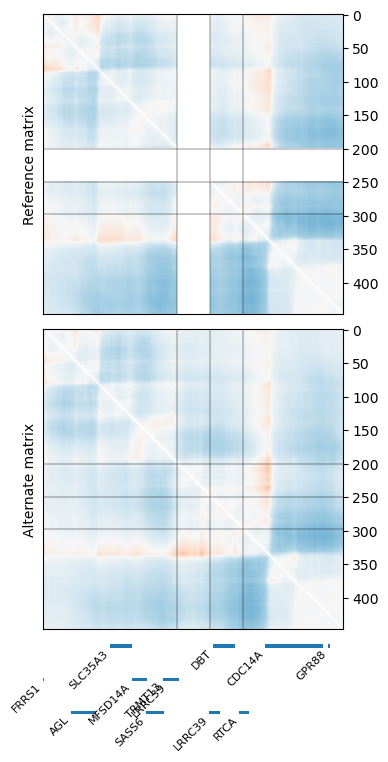

In [10]:
# Choose the conditions of the map you would like to extract
var_index = 0
shift = 0
revcomp = ''

variant_id = f'{var_index}_{shift}{revcomp}'

REF_pred, ALT_pred = maps[variant_id][:2]
rel_pos_map, map_start_coord = maps[variant_id][2:]

CHR = scores[scores.var_index == var_index].CHROM[0]

if 'SVLEN' in variants.columns:
    SVLEN = variants.iloc[var_index].SVLEN
    SVTYPE = variants.iloc[var_index].SVTYPE
else:
    SVTYPE, SVLEN = '-', '-'

genes_in_map = plotting_utils.get_genes_in_map(CHR, map_start_coord, rel_pos_map, SVTYPE, SVLEN)

lines = plotting_utils.get_var_bins(rel_pos_map, SVTYPE, SVLEN)

plotting_utils.plot_maps_genes(REF_pred, ALT_pred, genes_in_map, lines)

# Tracks files

In [1]:
# Read in maps

tracks = np.load('../temp_output/score_var_results_tracks.npy', allow_pickle="TRUE").item() # f'{out_file}_maps.npy'
tracks

NameError: name 'np' is not defined

In [2]:
tracks.keys()

NameError: name 'tracks' is not defined

In [30]:
# Plot disruption tracks

var_index = 0
scoring_method = 'mse'
shift = 0
revcomp = ''


variant_id = f'{var_index}_{scoring_method}_track_{shift}{revcomp}'

disruption_track = tracks[variant_id]


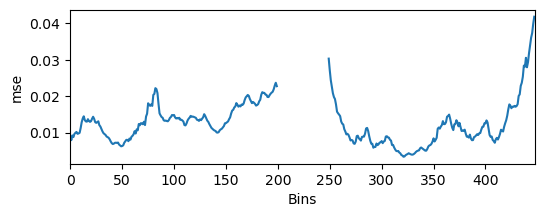

In [31]:
plotting_utils.plot_disruption_tracks(disruption_track, scoring_method)

In [26]:
plotting_utils.plot_maps_genes_tracks(REF_pred, ALT_pred, genes_in_map, lines, disruption_track, scoring_method)

NameError: name 'disruption_track' is not defined